### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from pandas import DatetimeIndex

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

### Carregamento dos dados

In [2]:
dataOriginal = pd.read_csv('new_Global_Superstore_With_Outliers.csv', index_col=0, comment='#') 
df = dataOriginal 


In [3]:
df.head(3)

,Ship Mode,Segment,City,State,Country,Region,Category,Sub-Category,Sales,Quantity,...,order_day,order_month,order_year,ship_year,ship_month,ship_day,discount_bracket,pib_country,ship_mode_binned,Market_binned
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,0,0,1,5,23,5,2,0,2309.650,7.0,...,31,7,2012,2012,7,31,0,1.619700e+13,1.0,2
26341,2,1,2,4,0,8,0,5,3709.395,9.0,...,5,2,2013,2013,2,7,0,1.576340e+12,1.0,0
25330,1,0,2,9,0,8,2,13,5175.171,9.0,...,17,10,2013,2013,10,18,0,1.576340e+12,1.0,0


### Tratamento dos dados

In [4]:
# Já está justificado no ficheiro data_exploration o porquê de removermos Códigos postais.
if 'Postal Code' in df.columns:
    df = df.drop('Postal Code', axis=1)
 

df = df.rename(columns = {'Shipping Cost':'Shipping_Cost'})
df = df.rename(columns = {'Order Priority':'Order_Priority'})

#data['Product Name'] = data['Product Name'].mode().iloc[0]
#data.Order_Priority = most_imputer2.fit_transform(data[['Order_Priority']])

print("Total de valores nulos ")
print(df.isnull().sum())

Total de valores nulos 
Ship Mode           0
Segment             0
City                0
State               0
Country             0
Region              0
Category            0
Sub-Category        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping_Cost       0
Order_Priority      0
order_day           0
order_month         0
order_year          0
ship_year           0
ship_month          0
ship_day            0
discount_bracket    0
pib_country         0
ship_mode_binned    0
Market_binned       0
dtype: int64


### Preparação dos dados geral
No fim, apresentamos um antes e depois dos dados. Fizemos label encoding, normalizámos, escalámos e tirámos o skew.

--------------------------


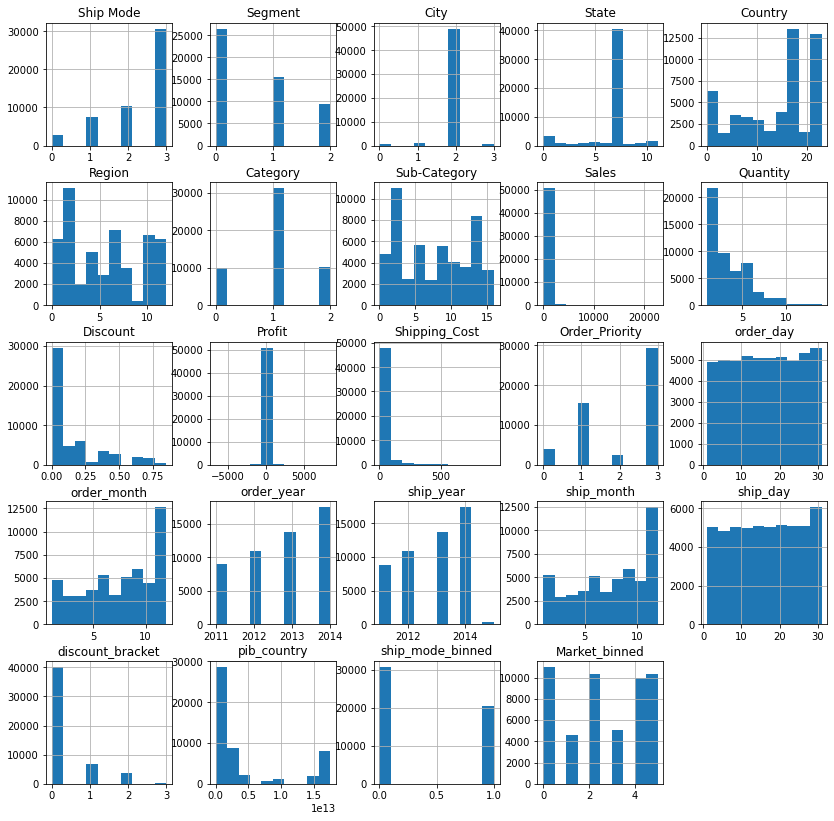

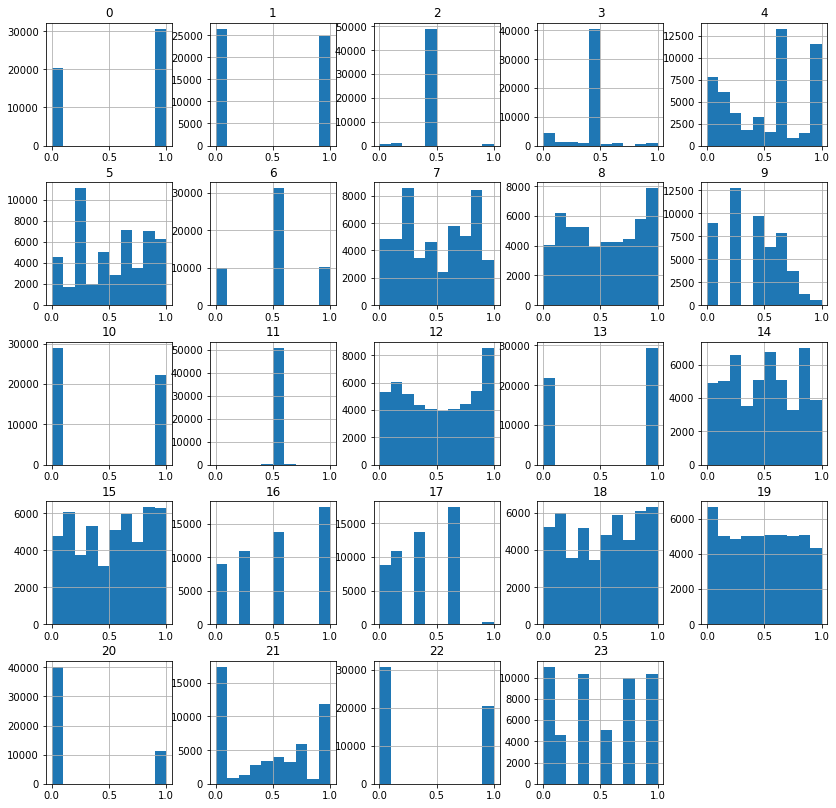

In [5]:



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler


df.hist(figsize=(14, 14));
print("--------------------------")
# Centrar, mas não de forma totalmente igual, porque outliers afetam 

ss = StandardScaler()
_ = ss.fit(df)
pt = PowerTransformer()
mms = MinMaxScaler()

# Transform
df = pd.DataFrame(ss.transform(df))

skew_cols = []

for coluna in df.columns:
    if abs(df[coluna].skew()) > 0.01:
       skew_cols.append(coluna)

    # Skew
if len(skew_cols):
    for coluna in skew_cols:
        df[skew_cols] = pd.DataFrame(pt.fit_transform(df[skew_cols]), columns=skew_cols, copy=False)
    #print(df3.skew()) 

# MinMaxScaller
df = pd.DataFrame(
    mms.fit_transform(df))
    
# Plot
df.hist(figsize=(14, 14));




## Modelos e comparações

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.10.0


In [7]:
# O número de colunas é o tamanho do dataset menos a coluna target

number_columns = len(df.columns)-1

def build_model(activation='relu', learning_rate=0.01):
#create a sequential model (with three Layers - Last one is the output)
    model = Sequential()
    model.add(Dense(number_columns, input_dim=number_columns, activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(1, activation='relu'))
  
     #compile the model
    #Define the Loss function, the otimizer and metrics to be used
    model. compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse'])
    return model

model = build_model()
model.summary()



model = KerasRegressor(build_fn=build_model, epochs=15,batch_size=number_columns)
grid_search = model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                552       
                                                                 
 dense_1 (Dense)             (None, 6)                 144       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


C:\Users\Diogo\AppData\Local\Temp\ipykernel_17368\2064588740.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model, epochs=15,batch_size=number_columns)


In [8]:
# Fui buscar daqui:
#https://towardsdatascience.com/7-of-the-most-commonly-used-regression-algorithms-and-how-to-choose-the-right-one-fc3c8890f9e3
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import LinearSVR
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import time

RANDOM_SEED = 2021

# Após as alterações, a coluna do profit ficou com o nome 17
X_MLP = df.drop(17, axis=1)
y_MLP = df[[17]]

np.random.seed(10)

# Quando estávamos a testar, reduzíamos o tamanho do dataset para não perdermos tanto tempo nos testes. 
# No fim, para ter os valores reais, não reduzimos o dataset.
small_dataset = False
if small_dataset: 
    remove_n = 20000
    drop_indices = np.random.choice(data3.index, remove_n, replace=False)
    data3_subset = data3.drop(drop_indices)
    X_MLP = data3_subset.drop(17, axis=1)
    y_MLP = data3_subset[[17]]

X_train, X_test, y_train, y_test = train_test_split(X_MLP, y_MLP, test_size=0.2, random_state=RANDOM_SEED)


lista_modelos = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=RANDOM_SEED),
    RandomForestRegressor(n_estimators=20, max_depth=10, criterion='squared_error' ),
    RANSACRegressor(LinearRegression(),
		max_trials=4, 		# Number of Iterations
		min_samples=2, 		# Minimum size of the sample
		loss='squared_error', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		),
    LinearSVR(random_state=RANDOM_SEED, tol=1e-5),
    xgb.XGBRegressor(),
    grid_search
    
    
]

for item in lista_modelos:
    print(str(item).split("(")[0])
    start_time = time.time()
    item.fit(X_train,y_train)
    predictions = item.predict(X_test)
    print("time - {}".format(time.time()-start_time))
    #print(predictions)
    print ('MRSE: ', mean_squared_error(y_test, predictions, squared=False))
    print("")


LinearRegression
time - 1.4570670127868652
MRSE:  0.01019563663820676

DecisionTreeRegressor
time - 0.33100223541259766
MRSE:  3.7146440021062197e-14

RandomForestRegressor


C:\Users\Diogo\AppData\Local\Temp\ipykernel_17368\1611695827.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  item.fit(X_train,y_train)


time - 4.69438624382019
MRSE:  2.7121249538727285e-14

RANSACRegressor
time - 0.2670924663543701
MRSE:  0.010195636638521258

LinearSVR


C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diogo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


time - 39.63206219673157
MRSE:  0.011140110532632561

XGBRegressor
time - 6.294980764389038
MRSE:  1.0639843899727555e-05

Epoch 1/15
1781/1781 [==============================] - 12s 4ms/step - loss: 0.0164 - mae: 0.0164 - mse: 0.0015
Epoch 2/15
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0089 - mae: 0.0089 - mse: 2.5095e-04
Epoch 3/15
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0069 - mae: 0.0069 - mse: 1.3068e-04
Epoch 4/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0061 - mae: 0.0061 - mse: 8.8942e-05
Epoch 5/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0058 - mae: 0.0058 - mse: 8.3871e-05
Epoch 6/15
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0053 - mae: 0.0053 - mse: 6.5343e-05
Epoch 7/15
1781/1781 [==============================] - 8s 4ms/step - loss: 0.0045 - mae: 0.0045 - mse: 5.3830e-05
Epoch 8/15
1781/1781 [==============================] - 7s 4ms/step - loss:

### Análise dos resultados

Após calcularmos as várias "Mean Squared Error", e as compararmos, vemos que é preferível utilizar modelos baseados em árvores (DecisionTreeRegressor, RandomForestRegressor), o XGBRegressor com parâmetros default, e as redes neuronais. Visto que os modelos em árvore são bastante parecidos, decidimos melhorar apenas o RandomForestRegressor, porque apresenta melhores resultados. No entanto, será bastante fácil implementar as melhorias feitas neste modelo no DecisionTreeRegressor.

Nos outros notebooks analisamos os modelos selecionados.